## E2: Jaccard Coefficient

This experiment looks at the effectiveness of using the jaccard coefficient for ASAG.

**Jaccard Coefficient**
$$
\frac{\lvert X \cap Y \rvert}{\lvert X \rvert + \lvert Y \rvert - \lvert X \cap Y \rvert}
$$

The jaccard coefficient looks at the total words which $X$ and $Y$ have in common, normalized by the total words in both sentences after subtracting how many words they share.

It is run on the English, German and Spanish Datasets.

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import exp_libs.word_overlap as wo
import libs.preprocessing as pp
import libs.stats as stats
import libs.utils as utils
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Load Dataset
df_en = pd.read_csv("../../../datasets/final/en/asag_v2_en_filter.csv", sep='~')
print(len(df_en))
df_en.head(2)

2010


ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   
1  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   
1  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   
1  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   
1   To simulate portions of the desired final pro...        5   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1  
1  correct_complete            NaN    5.0             2             1

In [3]:
pipeline_phases = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'remove_stopwords' : pp.create_remove_stopwords(pp.EN_STOPS),
                    'stemming' : pp.create_stemmer(pp.EN_STEMMER)}

pipeline = pp.create_pipeline(pipeline_phases, pp.whitespace_tokenize)

In [4]:
results = wo.execute_word_overlap_model(df_en, pipeline, wo.jaccard_coefficient)

             precision    recall  f1-score   support

        0.0       0.02      1.00      0.04        14
        1.0       0.00      0.25      0.00         8
        2.0       0.03      0.05      0.04       234
        3.0       0.02      0.01      0.02       157
        4.0       0.16      0.01      0.01       676
        5.0       1.00      0.02      0.04       921

avg / total       0.52      0.03      0.03      2010

Pearson's R: 0.3525754162819371
Cohen's Kappa: -0.01049657495996481
MAE: 3.0860696517412936
Accuracy: 2.59%
Precision: 51.67%
Recall: 2.59%
F1-Measure: 2.85%
Stored 'exp2_data' (dict)


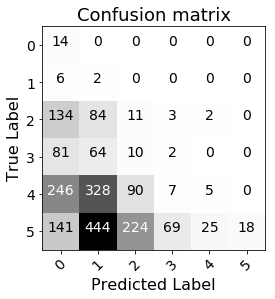

In [5]:
stats.print_all_stats(results['y_true'], results['y_pred'])

exp2_data = stats.get_all_stats(results['y_true'], results['y_pred'])
%store exp2_data

stats.plot_confusion_matrix(stats.cm(results['y_true'], results['y_pred']), classes=np.arange(6))

             precision    recall  f1-score   support

          0       0.25      0.97      0.39       477
          1       0.90      0.08      0.14      1533

avg / total       0.75      0.29      0.20      2010

Pearson's R: 0.08569564173685008
Cohen's Kappa: 0.02470749175839293
MAE: 0.6975124378109453
Accuracy: 28.96%
Precision: 74.56%
Recall: 28.96%
F1-Measure: 20.16%
Stored 'exp2_data_pf' (dict)


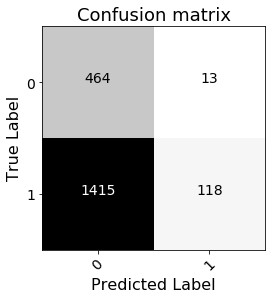

In [6]:
## Pass/Fail Evaluation
yt_pf = utils.convert_to_pass_fail(results['y_pred'])

stats.print_all_stats(df_en['Class2_Score'], yt_pf)

exp2_data_pf = stats.get_all_stats(df_en['Class2_Score'], yt_pf)
%store exp2_data_pf

stats.plot_confusion_matrix(stats.cm(df_en['Class2_Score'], yt_pf), classes=np.arange(2))

### H1 Evaluation:

1. answers which have a lot of tokens in common with model answer have high/correct scores

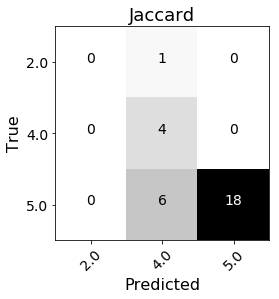

In [10]:
reload(wo)
reload(stats)
idxs = results['y_pred_raw'] > 0.75
klasses = np.unique(results['y_true'][idxs])
stats.plot_confusion_matrix(stats.cm(results['y_true'][idxs], results['y_pred'][idxs]), classes=klasses, title='Jaccard', savefile='../renderings/jaccard')

## Result:

Hypothesis is confirmed as well for the jaccard. Of 24 answers labeled 5.0 when tokens overlapped the model correctly predicted 18 as 5.0 and the other 6 received a score of 4.0.
4 Items with a label of 4.0 were all correctly identified and a few other high overlap items were misclassified.

In [9]:
reload(wo)
# inspecting false friends i.e. high overlap items which have low scores
idxs2 = np.logical_and(results['y_pred_raw'] > 0.75, results['y_true'] <= 4.0)

wo.inspect_results(df_en, results['y_true'], results['y_pred'], idxs2, results['sets'], size=2)

Prompt:  Order the following functions by their running time: n to the power of 2; log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n!; n to the power of 3. 
Score: 4.0, Score-Pred: 4
MA:  log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n to the power of 2; n to the power of 3; n! 
MA_set: {'n!', 'log', '2', '3;', '2;', '-lrb-', 'n', ';', 'power', '-rrb-'}
SA:  log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n!; n to the power of 2; n to the power of 3; 
SA_set: {'log', '2', '3;', 'n!;', '2;', '-lrb-', 'n', ';', 'power', '-rrb-'}
Prompt:  What is a variable? 
Score: 4.0, Score-Pred: 4
MA:  A location in memory that can store a value. 
MA_set: {'memori', 'locat', 'valu', 'store'}
SA:  An object with a location in memory where value can be stored 
SA_set: {'memori', 'locat', 'object', 'valu', 'store'}


#### Reasoning for False Prediction

1. Where ordering matters! Questions which require the student to put a response in a particular order completely fail.
2. With Jaccard still missing the same answers.

## H2 : Evaluation

1. Do correct answers with different wordings have lower scores?

Short Answer: Yes, the model misses a lot of answers which are correct and use different wordings.

339


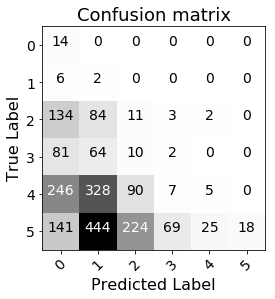

Prompt:  What is the advantage of linked lists over arrays? 
Score: 5.0, Score-Pred: 0
MA:  Linked lists are dynamic structures, which allow for a variable number of elements to be stored. 
MA_set: {'element', 'structur', 'list', 'number', 'dynam', 'link', 'variabl', 'allow', 'store'}
SA:  Linkded list does not have a fixed size.  Arrays have a fixed size. 
SA_set: {'size', 'array', 'list', 'fix', 'linkd'}
Prompt:  How are overloaded functions differentiated by the compiler? 
Score: 5.0, Score-Pred: 1
MA:  Based on the function signature.  When an overloaded function is called, the compiler will find the function whose signature is closest to the given function call. 
MA_set: {'overload', 'call', 'signatur', 'compil', 'given', 'closest', 'find', 'base', 'function', 'whose'}
SA:  it looks at the number, types, and order of arguments in the function call 
SA_set: {'call', 'look', 'number', 'argument', 'function', 'type', 'order'}
Prompt:  How can you implement a queue with an array? 
Sco

In [10]:
idxs3 = np.logical_and(results['y_pred_raw'] < 0.2, results['y_true'] > 4.0)
print(len(df_en[idxs3]))
cm3 = stats.cm(results['y_true'], results['y_pred'])
stats.plot_confusion_matrix(cm3, classes=np.arange(6))

wo.inspect_results(df_en, results['y_true'], results['y_pred'], idxs3, results['sets'], size=10)

## How much of difference does stopword Removal Make?

             precision    recall  f1-score   support

        0.0       0.03      1.00      0.07        14
        1.0       0.00      0.12      0.00         8
        2.0       0.02      0.03      0.03       234
        3.0       0.01      0.01      0.01       157
        4.0       0.16      0.01      0.02       676
        5.0       1.00      0.01      0.01       921

avg / total       0.51      0.02      0.02      2010

Pearson's R: 0.36474787135406134
Cohen's Kappa: -0.019471957031374387
MAE: 2.964676616915423
Accuracy: 1.79%
Precision: 51.49%
Recall: 1.79%
F1-Measure: 1.57%


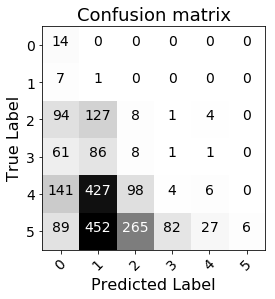

In [12]:
pipeline_phases1 = { 'case_normalization' : pp.case_normalization,
                     'punctuation_removal' : pp.punctuation_removal,
                     'stemming' : pp.create_stemmer(pp.EN_STEMMER)}

pipeline1 = pp.create_pipeline(pipeline_phases1, pp.whitespace_tokenize)

results1 = wo.execute_word_overlap_model(df_en, pipeline1, wo.jaccard_coefficient)

stats.print_all_stats(results1['y_true'], results1['y_pred'])
stats.plot_confusion_matrix(stats.cm(results1['y_true'], results1['y_pred']), classes=np.arange(6))

### Results

Removing Stopwords adds very little improvement but around $1\%$ for precision. This is due to the fact that in this approach any stopword can only make up at maximum one word in the sentence set of tokens.

## How good is this method for Fill-In-The-Blank Style Questions?

Hypothesis: it should be quite good for short model answers and short student responses, at least compared to longer answers, since FITB type questions usually are all or nothing affairs.

432
             precision    recall  f1-score   support

        0.0       0.09      1.00      0.17        13
        1.0       0.01      0.07      0.02        15
        2.0       0.02      0.03      0.02        33
        3.0       0.00      0.00      0.00         8
        4.0       0.00      0.00      0.00        45
        5.0       1.00      0.39      0.56       318

avg / total       0.74      0.32      0.42       432

Pearson's R: 0.4163986203625741
Cohen's Kappa: 0.1082177882989519
MAE: 2.314814814814815
Accuracy: 32.18%
Precision: 74.07%
Recall: 32.18%
F1-Measure: 42.06%


/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


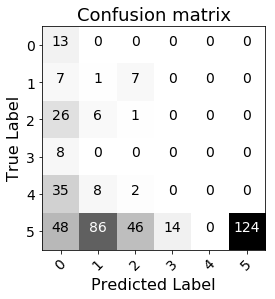

In [13]:
## Load Dataset
df_fitb = pd.read_csv("../../../datasets/final/en/asag_v2_en_fitb.csv", sep='~')
print(len(df_fitb))
df_fitb.head(1)

results_fitb = wo.execute_word_overlap_model(df_fitb, pipeline, wo.jaccard_coefficient)

stats.print_all_stats(results_fitb['y_true'], results_fitb['y_pred'])
stats.plot_confusion_matrix(stats.cm(results_fitb['y_true'], results_fitb['y_pred']), classes=np.arange(6))

### Results

It is vastly better at FITB style questions, reaffirming the notion that those questions are fundamentally different than the rest; that is they are in their own category. Whether or not using FITB methods for dealing with such questions is the best approach remains to be seen.

## German Evaluation

2010


ID  AID  QID                                             Prompt  \
0  1.1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                                  MA  \
0  Um das Verhalten von Teilen des gewünschten So...   

                                                 MA2  \
0  um ein Beispiel und Feedback zur Funktionsweis...   

                                                 MA3  \
0  als Konzeptnachweis dienen und veranschauliche...   

                                          NA  \
0  um Fehler zu finden oder Daten zu sammeln   

                                                  SA  MyScore  \
0  In dem Prototyp-Programm werden Probleme mit h...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

             precision    recall  f1-score   support

        0.0       0.01      1.00      0.03        14
        1.0       0.00      0.00      0.00         8
        2.0       0.03      0.02      0.02       234
        3.0       0.02      0.01      0.01       157
        4.0       0.20      0.00      0.01       676
        5.0       1.00      0.01      0.02       921

avg / total       0.53      0.01      0.01      2010

Pearson's R: 0.2964220862667693
Cohen's Kappa: -0.006887150614105719
MAE: 3.4328358208955225
Accuracy: 1.49%
Precision: 53.03%
Recall: 1.49%
F1-Measure: 1.35%


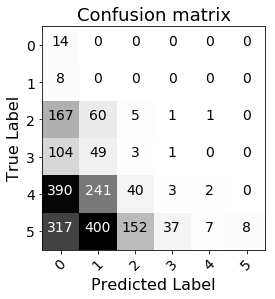

In [16]:
## Load Dataset
df_de = pd.read_csv("../../../datasets/final/de/asag_v2_de_filter.csv", sep='~')
print(len(df_de))
display(df_de.head(1))

pipeline_phases2 = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'remove_stopwords' : pp.create_remove_stopwords(pp.DE_STOPS),
                    'stemming' : pp.create_stemmer(pp.DE_STEMMER)}

pipeline2 = pp.create_pipeline(pipeline_phases2, pp.whitespace_tokenize)

results2 = wo.execute_word_overlap_model(df_de, pipeline2, wo.jaccard_coefficient)

stats.print_all_stats(results2['y_true'], results2['y_pred'])
stats.plot_confusion_matrix(stats.cm(results2['y_true'], results2['y_pred']), classes=np.arange(6))

## Spanish Evaluation

2010


ID  AID  QID                                             Prompt  \
0  1.1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                                  MA  \
0  Para simular el comportamiento de porciones de...   

                                                 MA2  \
0  para proporcionar un ejemplo y retroalimentaci...   

                                                 MA3  \
0  para servir como prueba de concepto e ilustrar...   

                                         NA  \
0  para encontrar errores o recopilar datos   

                                                  SA  MyScore  \
0  Los problemas de alto riesgo se abordan en el ...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

             precision    recall  f1-score   support

        0.0       0.02      1.00      0.04        14
        1.0       0.00      0.25      0.00         8
        2.0       0.03      0.04      0.04       234
        3.0       0.01      0.01      0.01       157
        4.0       0.11      0.00      0.01       676
        5.0       1.00      0.02      0.04       921

avg / total       0.50      0.02      0.02      2010

Pearson's R: 0.3957295299866964
Cohen's Kappa: -0.011680285204698437
MAE: 3.117412935323383
Accuracy: 2.34%
Precision: 49.90%
Recall: 2.34%
F1-Measure: 2.46%


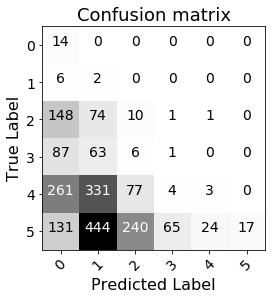

In [17]:
## Load Dataset
df_es = pd.read_csv("../../../datasets/final/es/asag_v2_es_filter.csv", sep='~')
print(len(df_es))
display(df_es.head(1))

pipeline_phases3 = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'remove_stopwords' : pp.create_remove_stopwords(pp.ES_STOPS),
                    'stemming' : pp.create_stemmer(pp.ES_STEMMER)}

pipeline3 = pp.create_pipeline(pipeline_phases3, pp.whitespace_tokenize)

results3 = wo.execute_word_overlap_model(df_es, pipeline3, wo.jaccard_coefficient)

stats.print_all_stats(results3['y_true'], results3['y_pred'])
stats.plot_confusion_matrix(stats.cm(results3['y_true'], results3['y_pred']), classes=np.arange(6))